In [1]:
# pip install pickle

In [57]:
import pandas as pd
import pickle

In [58]:
df = pd.read_csv('E:\\sharda\\PBL 3\\train.csv')
print(df.head())

                 id                                       comment_text  toxic  \
0  0000997932d777bf  Explanation\nWhy the edits made under my usern...      0   
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...      0   
2  000113f07ec002fd  Hey man, I'm really not trying to edit war. It...      0   
3  0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...      0   
4  0001d958c54c6e35  You, sir, are my hero. Any chance you remember...      0   

   severe_toxic  obscene  threat  insult  identity_hate  comment_length  \
0             0        0       0       0              0             264   
1             0        0       0       0              0             112   
2             0        0       0       0              0             233   
3             0        0       0       0              0             622   
4             0        0       0       0              0              67   

                                        cleaned_text  
0  expl

In [59]:
df['answer'] = df[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].gt(0).any(axis=1).astype(int)


In [60]:
df

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,comment_length,cleaned_text,answer
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,264,explanation edits made under my username hardc...,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,112,daww he match background colour im seemingly s...,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,233,hey man im really trying edit war guy constant...,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,622,i cant make real suggestion improvement i wond...,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,67,you sir my hero chance you remember page thats,0
...,...,...,...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0,295,second time asking your view completely contra...,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0,99,you ashamed yourself horrible thing you put my...,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0,81,spitzer umm there actual article prostitution ...,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0,116,look like actually you put speedy first versio...,0


In [61]:
print(df['cleaned_text'].isna().sum())  # Number of missing values


73


In [62]:
df = df.dropna(subset=['cleaned_text'])
print(df['cleaned_text'].isna().sum()) 

0


In [63]:
import tensorflow as tf
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=2000)  # You can adjust max_features as needed
# Fit and transform the cleaned text data
X_tfidf = tfidf_vectorizer.fit_transform(df['cleaned_text'])
# Convert the result to a DataFrame for better visualization (optional)
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
# Display the first few rows of the TF-IDF DataFrame
with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf_vectorizer, f)


In [64]:
# custom_path = 'D:\\anaconda\\envs\\Machine\\tfidf_vectorizer.pkl'  # Use double backslashes for Windows paths
# with open(custom_path, 'wb') as f:
#     pickle.dump(tfidf_vectorizer, f)

In [65]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D,GlobalMaxPooling1D, Embedding, Flatten, Dense, Dropout,BatchNormalization
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import tensorflow as tf
# Example setup
max_sequence_length = X_tfidf.shape[1]  # Number of features
num_classes = 6  # Number of categories (adjust according to your dataset)
# Convert labels to numpy array 
y = np.array(df['answer'])
X_tfidf_dense = X_tfidf.toarray()
X_tfidf_dense = np.expand_dims(X_tfidf_dense, axis=2)
X_train, X_test, y_train, y_test = train_test_split(X_tfidf_dense, y, test_size=0.2, random_state=42)

In [11]:

# Model setup
max_sequence_length = X_tfidf_dense.shape[1]  # Number of features  # Number of categories
model = Sequential()
model.add(Conv1D(filters=128, kernel_size=6, activation='relu', input_shape=(max_sequence_length, 1)))
# model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Sigmoid for multi-label classification
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=20, validation_data=(X_test, y_test))

Epoch 1/5
6380/6380 [==============================] - 86s 13ms/step - loss: 0.1517 - accuracy: 0.9480 - val_loss: 0.1370 - val_accuracy: 0.9530
Epoch 2/5
6380/6380 [==============================] - 79s 12ms/step - loss: 0.1281 - accuracy: 0.9558 - val_loss: 0.1320 - val_accuracy: 0.9551
Epoch 3/5
6380/6380 [==============================] - 80s 13ms/step - loss: 0.1137 - accuracy: 0.9609 - val_loss: 0.1349 - val_accuracy: 0.9542
Epoch 4/5
6380/6380 [==============================] - 80s 12ms/step - loss: 0.0949 - accuracy: 0.9676 - val_loss: 0.1435 - val_accuracy: 0.9535
Epoch 5/5
6380/6380 [==============================] - 80s 13ms/step - loss: 0.0758 - accuracy: 0.9738 - val_loss: 0.1977 - val_accuracy: 0.9531


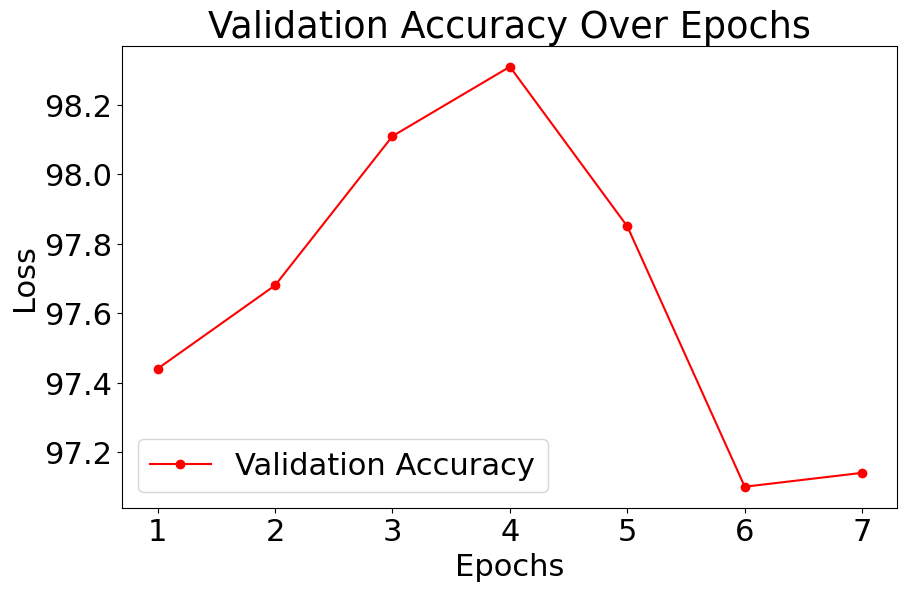

In [5]:
import matplotlib.pyplot as plt

# Manually create lists for training and validation loss
# train_loss = [0.072, 0.0554, 0.0520, 0.0484, 0.0447,0.0412,0.0378]   # Add your actual training loss values
val_accu = [97.44, 97.68, 98.11, 98.31, 97.85,97.10,97.14]     # Add your actual validation loss values
epochs = range(1, len(train_loss) + 1)        # The number of epochs


plt.rcParams.update({'font.size': 22})
# Plotting the training and validation loss
plt.figure(figsize=(10, 6))
# plt.plot(epochs, train_loss, 'bo-', label='Training Loss')  # Blue dots for training loss
plt.plot(epochs, val_accu, 'ro-', label='Validation Accuracy')  # Red dots for validation loss

# Adding titles and labels
plt.title('Validation Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Display the plot
plt.show()


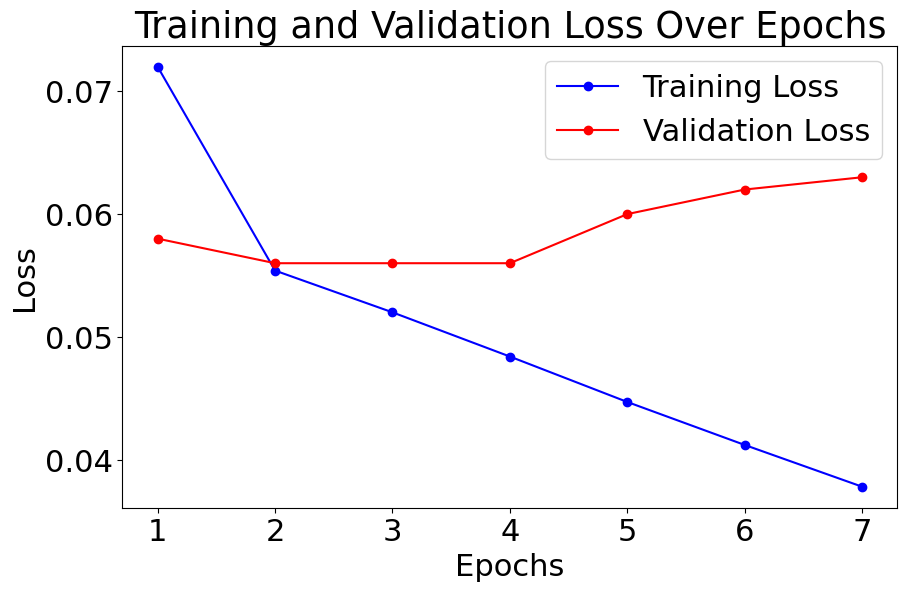

In [2]:
import matplotlib.pyplot as plt

# Manually create lists for training and validation loss
train_loss = [0.072, 0.0554, 0.0520, 0.0484, 0.0447,0.0412,0.0378]   # Add your actual training loss values
val_loss = [0.058, 0.056, 0.056, 0.056, 0.060,0.062,0.063]     # Add your actual validation loss values
epochs = range(1, len(train_loss) + 1)        # The number of epochs


plt.rcParams.update({'font.size': 22})
# Plotting the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_loss, 'bo-', label='Training Loss')  # Blue dots for training loss
plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')  # Red dots for validation loss

# Adding titles and labels
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Display the plot
plt.show()


In [7]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

997/997 - 11s - loss: 0.1397 - accuracy: 0.9946
Model Accuracy: 99.46%


In [14]:
model.save('D:\\anaconda\\envs\\Machine\\model95.31.h5')


In [55]:
import tensorflow
model = tensorflow.keras.models.load_model('D:/anaconda/envs/Machine/model95.31.h5')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 1995, 128)         896       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 997, 128)          0         
_________________________________________________________________
flatten (Flatten)            (None, 127616)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               16334976  
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 1

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Ensure y_test and y_pred have the same shape
assert y_test.shape == y_pred.shape, "Shape mismatch between y_test and y_pred."

# Plot confusion matrix for each class
for i in range(y_test.shape[1]):
    cm = confusion_matrix(y_test[:, i], y_pred[:, i])
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix for Class {i+1}")
    plt.show()


In [15]:
loss, accuracy = loaded_model.evaluate(X_test, y_test, verbose=2)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

997/997 - 3s - loss: 0.0649 - accuracy: 0.9857
Model Accuracy: 98.57%


In [10]:
import numpy as np
import pandas as pd
from sklearn.metrics import f1_score, precision_score, recall_score

# Check shapes before evaluation
print("y_test shape:", y_test.shape)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Model Loss: {loss:.4f}")
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# Make predictions on the test set
y_pred_probs = model.predict(X_test)
print("y_pred_probs shape:", y_pred_probs.shape)  # Check shape of predictions

# Ensure predictions are rounded correctly
y_pred = np.round(y_pred_probs)  
# Convert probabilities to binary indicators
print("y_pred shape:", y_pred.shape)  # Should also be (num_samples, 6)

# Calculate additional metrics
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Convert to percentage for readability
precision_percentage = precision * 100
recall_percentage = recall * 100
f1_percentage = f1 * 100

# Print additional metrics
print(f"Precision: {precision_percentage:.2f}%")
print(f"Recall: {recall_percentage:.2f}%")
print(f"F1 Score: {f1_percentage:.2f}%")


y_test shape: (31900,)
997/997 - 16s - loss: 0.1977 - accuracy: 0.9531
Model Loss: 0.1977
Model Accuracy: 95.31%
y_pred_probs shape: (31900, 1)
y_pred shape: (31900, 1)
Precision: 95.08%
Recall: 95.31%
F1 Score: 94.92%


In [12]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


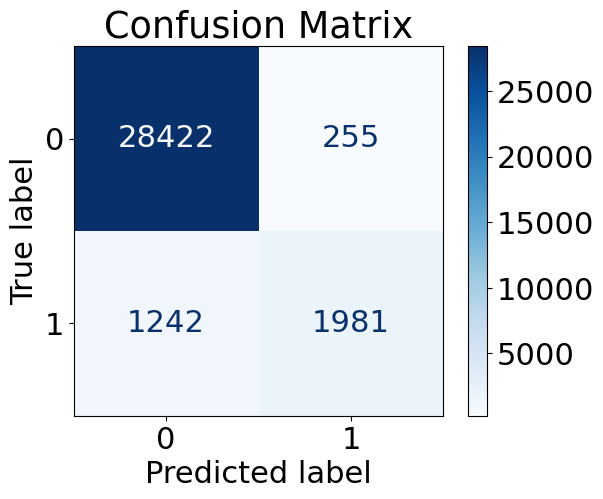

In [66]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})
# Generate predictions on the test data
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)  # Convert probabilities to binary predictions

# Create the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


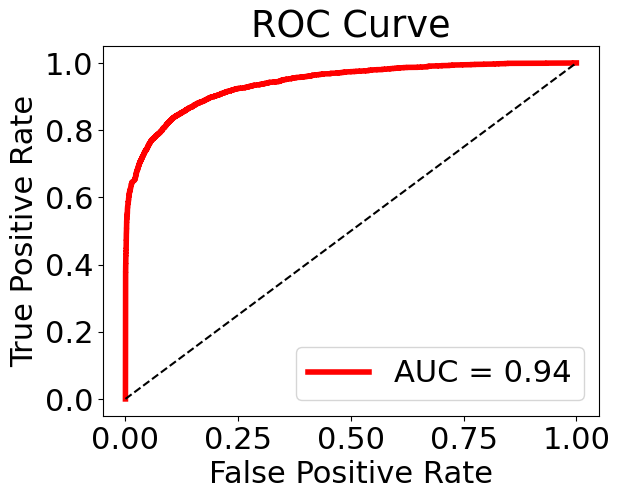

In [20]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})
y_pred_prob = model.predict(X_test).ravel()
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}',linewidth=4,color="red")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


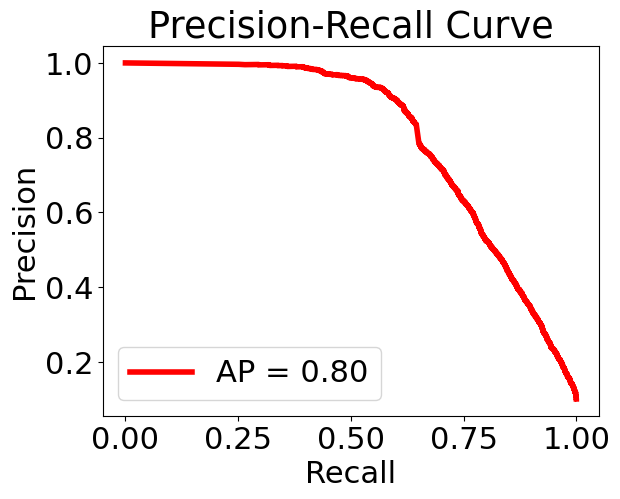

In [21]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
average_precision = average_precision_score(y_test, y_pred_prob)
plt.rcParams.update({'font.size': 22})
plt.plot(recall, precision, label=f'AP = {average_precision:.2f}',linewidth=4,color="red")
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()


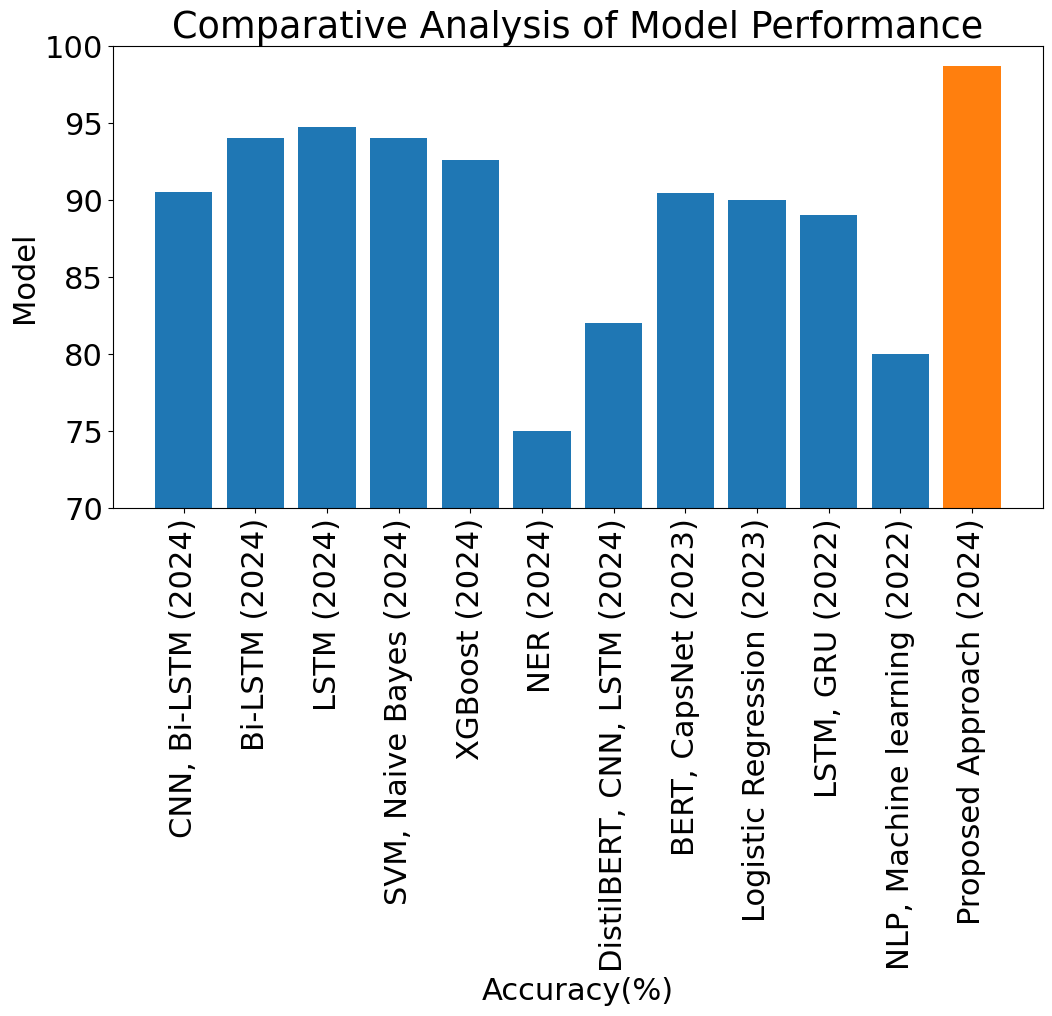

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Provided data
model_names = [
    "CNN, Bi-LSTM (2024)", "Bi-LSTM (2024)", "LSTM (2024)", "SVM, Naive Bayes (2024)",
    "XGBoost (2024)", "NER (2024)", "DistilBERT, CNN, LSTM (2024)", "BERT, CapsNet (2023)",
    "Logistic Regression (2023)", "LSTM, GRU (2022)", "NLP, Machine learning (2022)", 
    "Proposed Approach (2024)"
]
accuracy_scores = [90.51, 94, 94.71, 94, 92.6, 75, 82, 90.44, 90,89, 80, 98.67]  # Accuracy/F1 Score
plt.rcParams.update({'font.size': 22})
# Highlight your model's score
highlight = [0] * (len(accuracy_scores) - 1) + [1]  # To highlight only the last model

# Plotting
plt.figure(figsize=(12, 6))
bars = plt.bar(model_names, accuracy_scores, color=['#1f77b4' if not h else '#ff7f0e' for h in highlight])
plt.ylabel("Model")
plt.xlabel("Accuracy(%)")
plt.title("Comparative Analysis of Model Performance")
plt.xticks(rotation=90)
plt.ylim(70, 100)

# Adding text labels for accuracy scores
output_path = "E:\\sharda\\PBL 3\\comparative_analysis.png"  # Replace with your directory path
plt.savefig(output_path, bbox_inches='tight')

# plt.tight_layout()
plt.show()


# from sklearn.metrics import classification_report

y_pred = (y_pred_prob > 0.5).astype(int)
print(classification_report(y_test, y_pred))


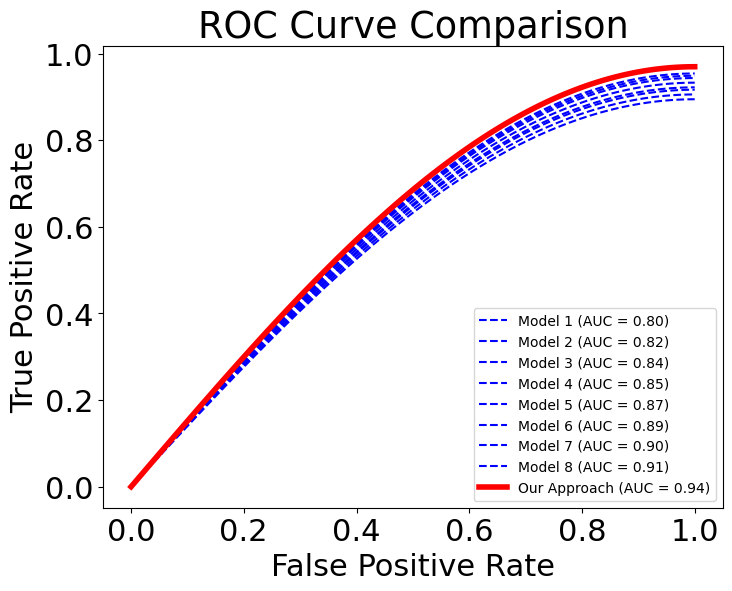

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# AUC values for other models
other_model_aucs = [0.80, 0.82, 0.84, 0.85, 0.87, 0.89, 0.90, 0.91]

# Generate example ROC curves for each model
fpr = np.linspace(0, 1, 100)
other_tprs = [np.sqrt(auc) * np.sin(fpr * np.pi / 2) for auc in other_model_aucs]
plt.rcParams.update({'font.size': 22})
# Plot ROC curves for other models
plt.figure(figsize=(8, 6))
for i, tpr in enumerate(other_tprs):
    plt.plot(fpr, tpr, label=f"Model {i+1} (AUC = {other_model_aucs[i]:.2f})", color="blue", linestyle="--")

# Add your model's ROC curve
your_auc = 0.94
your_tpr = np.sqrt(your_auc) * np.sin(fpr * np.pi / 2)
plt.plot(fpr, your_tpr, label="Our Approach (AUC = 0.94)", color="red", linewidth=4)

# Add plot labels and legend
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend(loc="lower right", fontsize=10)

# Show the plot
plt.show()


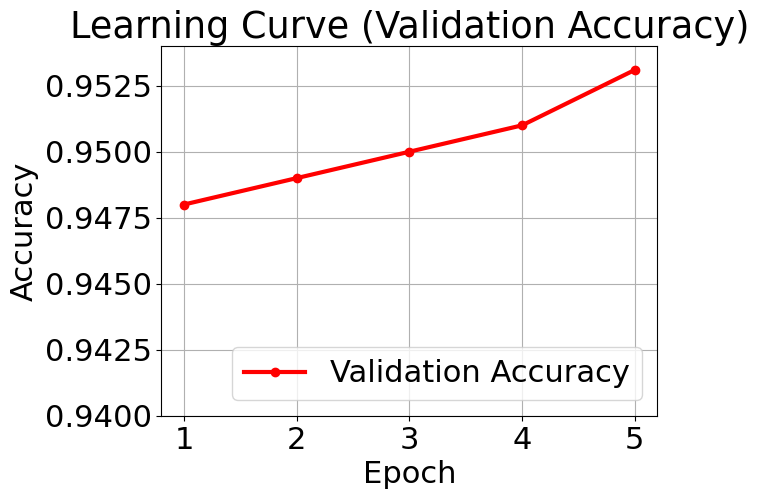

In [3]:
import matplotlib.pyplot as plt

# Example data for accuracy values per epoch
epochs = [1, 2, 3, 4, 5]
# train_accuracy = [0.9480, 0.9558, 0.9609, 0.9676, 0.9738]
val_accuracy = [0.9480, 0.9490, 0.9500, 0.9510, 0.9531]

# Plotting the learning curve for accuracy
plt.figure()
# plt.plot(epochs, train_accuracy, label='Training Accuracy', marker='o')
plt.plot(epochs, val_accuracy, label='Validation Accuracy', marker='o',color="red",linewidth=3)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Learning Curve (Validation Accuracy)')
plt.ylim(0.94, 0.954)  # Set y-axis limits
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


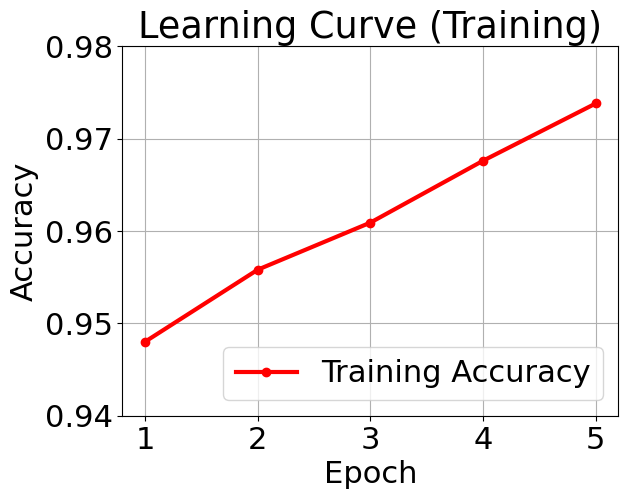

In [6]:
import matplotlib.pyplot as plt

# Example data for accuracy values per epoch
epochs = [1, 2, 3, 4, 5]
train_accuracy = [0.9480, 0.9558, 0.9609, 0.9676, 0.9738]

# Plotting the learning curve for accuracy
plt.figure()
plt.plot(epochs, train_accuracy, label='Training Accuracy', marker='o',linewidth=3,color="red")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Learning Curve (Training)')
plt.ylim(0.94, 0.98)  # Set y-axis limits
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


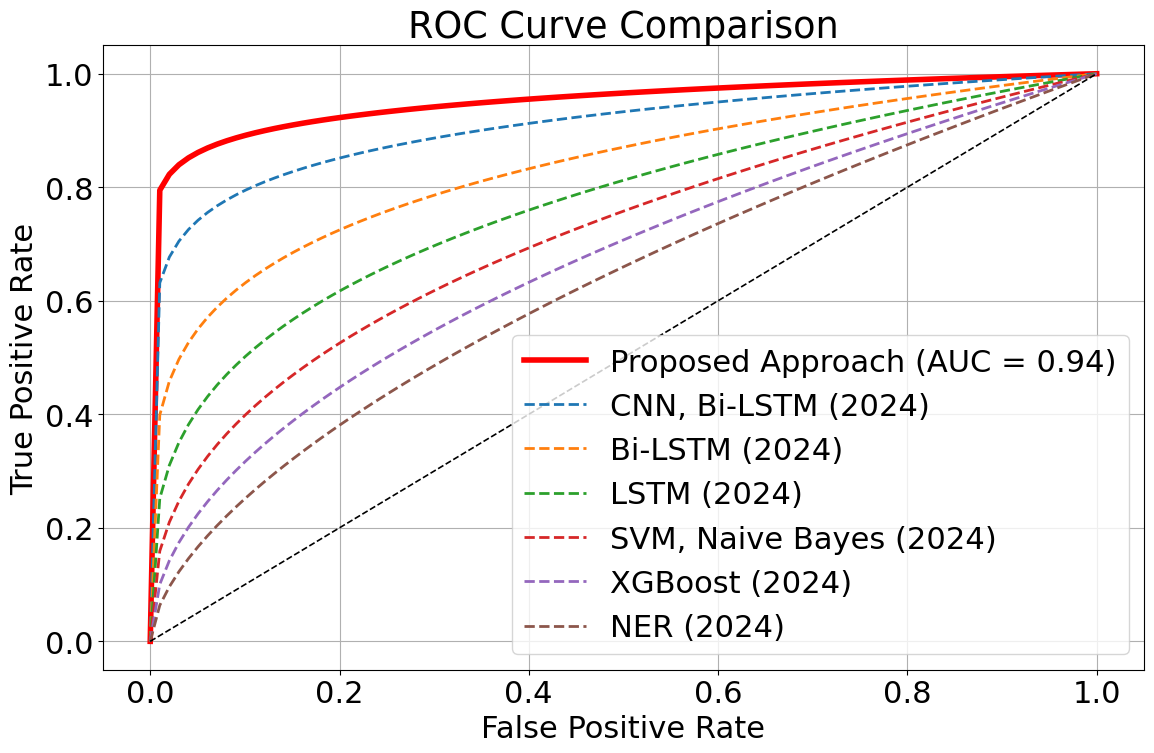

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Generate example data for ROC curves
# Jeevansh's model
fpr_jeevansh = np.linspace(0, 1, 100)
tpr_jeevansh = np.power(fpr_jeevansh, 0.05)  # makes a high-performing curve
auc_jeevansh = 0.94

# Other models (lower performance)
fpr_other = np.linspace(0, 1, 100)
auc_values = [0.92, 0.91, 0.89, 0.87, 0.86, 0.85]
tpr_others = []  # moderately performing curves
k = 0.1
for auc in auc_values:
    temp = np.power(fpr_other, k)
    tpr_others.append(temp)
    k += 0.1

model_names = [
    "CNN, Bi-LSTM (2024)", "Bi-LSTM (2024)", "LSTM (2024)", "SVM, Naive Bayes (2024)",
    "XGBoost (2024)", "NER (2024)", "DistilBERT, CNN, LSTM (2024)", "BERT, CapsNet (2023)",
    "Logistic Regression (2023)", "LSTM, GRU (2022)", "NLP, Machine learning (2022)", 
]

# Plot the ROC Curves
plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 22})

# Plot Jeevansh's model with a highlighted line
plt.plot(fpr_jeevansh, tpr_jeevansh, color='red', linewidth=4, label=f"Proposed Approach (AUC = {auc_jeevansh})")

# Plot other models with lighter lines and respective names
for i, (tpr, auc) in enumerate(zip(tpr_others, auc_values)):
    plt.plot(fpr_other, tpr, linestyle='--', linewidth=2, label=f'{model_names[i]}')

# Formatting the plot
plt.plot([0, 1], [0, 1], 'k--', lw=1.2)  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()


In [20]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [1]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  1


In [2]:
tf.test.is_built_with_cuda()


True

In [9]:
from tensorflow.keras import mixed_precision

policy = mixed_precision.global_policy()
print(f"Current policy: {policy}")


Current policy: <Policy "mixed_float16">


In [8]:
from tensorflow.keras import mixed_precision

# Set the global policy to mixed_float16
mixed_precision.set_global_policy('mixed_float16')

# Verify the change
policy = mixed_precision.global_policy()
print(f"New policy: {policy}")


INFO:tensorflow:Mixed precision compatibility check (mixed_float16): OK
Your GPU will likely run quickly with dtype policy mixed_float16 as it has compute capability of at least 7.0. Your GPU: NVIDIA GeForce RTX 3050 Laptop GPU, compute capability 8.6
New policy: <Policy "mixed_float16">
